> Yann LeCun famously said that “if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake”

> *Clustering*: the goal is to group similar instances together into clusters. This is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more

>*Anomaly detection*: the objective is to learn what “normal” data looks like, and use this to detect abnormal instances, such as defective items on a production line or a new trend in a time series

>*Density estimation*: this is the task of estimating the probability density function (PDF) of the random process that generated the dataset. This is commonly used for anomaly detection: **instances located in very low-density regions are likely to be anomalies**. It is also useful for data analysis and visualization

#Clustering

**Clustering: it is the task of identifying similar instances and assigning them to clusters, i.e., groups of similar instances.** Just like in classification, each instance gets assigned to a group. However, this is an unsupervised task

Consider Figure 9-1: on the left is the iris dataset, where each instance’s species (i.e., its class) is represented with a different marker. It is a labeled dataset, for which classification algorithms such as Logistic Regression, SVMs or Random Forest classifiers are well suited

On the right is the same dataset, but without the labels, so you cannot use a classification algorithm anymore. This is where clustering algorithms step in: many of them can easily detect the lower-left cluster. It is also quite easy to see with our own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct sub-clusters.

That said, the dataset has two additional features (sepal length and width), not represented here, and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster)

<p align='center'>
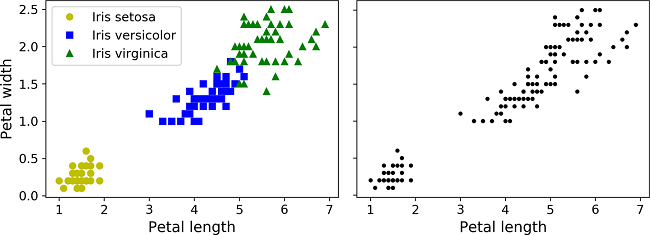
</p>
Figure 9-1. Classification (left) versus clustering (right)

Clustering is used in a wide variety of applications, including these:

**For customer segmentation**
* You can cluster your customers based on their purchases and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment

* For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed

**For data analysis**
* When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately

**As a dimensionality reduction technique**
* Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional

* This vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing

**For anomaly detection (also called outlier detection)**
* Any instance that has a low affinity to all the clusters is likely to be an anomaly

* For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection

**For semi-supervised learning**

* If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance

**For search engines**

*  Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is use the trained clustering model to find this image’s cluster, and you can then simply return all the images from this cluster

**To segment an image**

* By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object


**Some algorithms look for instances centered around a particular point, called a centroid**. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some algorithms are hierarchical, looking for clusters of clusters

## K-Means

Consider the unlabeled dataset represented in Figure 9-2: you can clearly see five blobs of instances. The K-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations



<p align='center'>
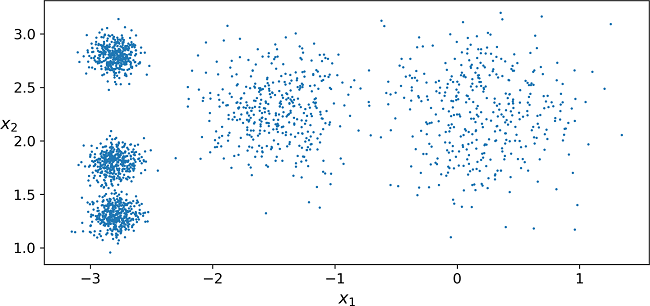
</p>
Figure 9-2. An unlabeled dataset composed of five blobs of instances

Let's start by generating some blobs

In [1]:
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Let’s train a K-Means clusterer on this dataset. It will try to find each blob’s center and assign each instance to the closest blob


In [3]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Note that you have to specify the number of clusters k that the algorithm must find. In this example, it is pretty obvious from looking at the data that k should be set to 5

Each instance was assigned to one of the five clusters. In the context of clustering, an instance’s label is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification (remember that clustering is an unsupervised learning task)

The KMeans instance preserves a copy of the labels of the instances it was trained on, available via the labels_ instance variable:

In [4]:
y_pred

array([1, 4, 3, ..., 2, 3, 4], dtype=int32)

In [5]:
y_pred is kmeans.labels_

True

We can also take a look at the five centroids that the algorithm found:

In [6]:
kmeans.cluster_centers_

array([[-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566],
       [-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999]])

You can easily assign new instances to the cluster whose centroid is closest:

In [7]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([3, 3, 2, 2], dtype=int32)

If you plot the cluster’s decision boundaries, you get a Voronoi tessellation (see Figure 9-3, where each centroid is represented with an X)

<p align='center'>
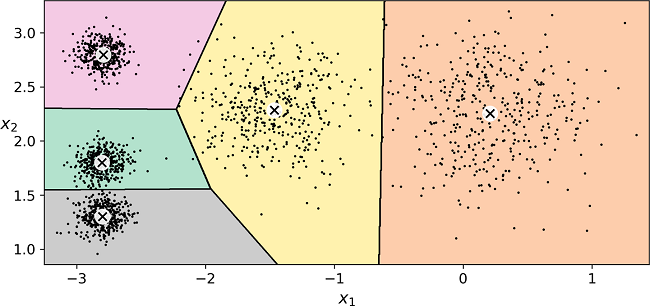
</p>
Figure 9-3. K-Means decision boundaries (Voronoi tessellation)

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially near the boundary between the top-left cluster and the central cluster). Indeed, the K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid

**Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering**

The score can be the distance between the instance and the centroid; conversely, it can be a similarity score (or affinity), such as the Gaussian Radial Basis Function (introduced in Chapter 5)

In the KMeans class, the transform() method measures the distance from each instance to every centroid:

In [8]:
kmeans.transform(X_new)

array([[1.49439034, 2.88633901, 2.9042344 , 0.32995317, 2.81093633],
       [4.4759332 , 5.84236351, 5.84739223, 2.80290755, 5.80730058],
       [1.69136631, 1.71086031, 0.29040966, 3.29399768, 1.21475352],
       [1.54808703, 1.21567622, 0.36159148, 3.21806371, 0.72581411]])

In this example, the first instance in X_new is located at a distance of 2.81 from the first centroid, 0.33 from the second centroid, 2.90 from the third centroid, 1.49 from the fourth centroid, and 2.89 from the fifth centroid

If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique

The computational complexity of the algorithm is generally linear with regard to the number of instances m, the number of clusters k, and the number of dimensions n. However, this is only true when the data has a clustering structure. If it does not, then in the worst-case scenario the complexity can increase exponentially with the number of instances. In practice, this rarely happens, and K-Means is generally one of the fastest clustering algorithms

### The K-Means algorithm

So, how does the algorithm work? Well, suppose you were given the centroids. You could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the instance labels, you could easily locate all the centroids by computing the mean of the instances for each cluster

But you are given neither the labels nor the centroids, so how can you proceed? Well, **just start by placing the centroids randomly (e.g., by picking k instances at random and using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving**

The algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever

You can see the algorithm in action in Figure 9-4: the centroids are initialized randomly (top left), then the instances are labeled (top right), then the centroids are updated (center left), the instances are relabeled (center right), and so on. As you can see, in just three iterations, the algorithm has reached a clustering that seems close to optimal



<p align='center'>
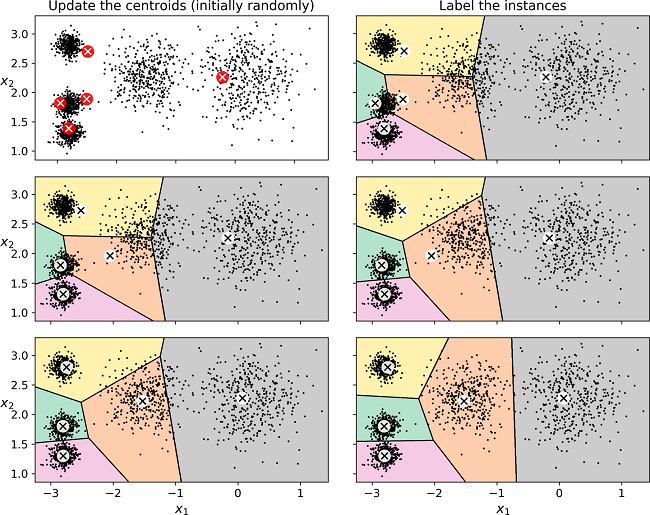
</p>
Figure 9-4. The K-Means algorithm

Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization

Figure 9-5 shows two suboptimal solutions that the algorithm can converge to if you are not lucky with the random initialization step

<p align='center'>
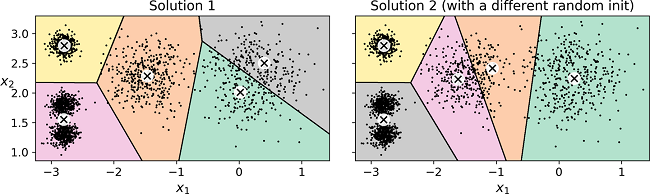
</p>
Figure 9-5. Suboptimal solutions due to unlucky centroid initializations

### Centroid initialization methods

If you happen to know approximately where the centroids should be (e.g.,
if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:

In [9]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [10]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True,
       init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       max_iter=300, n_clusters=5, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. **The number of random initializations is controlled by the n_init hyperparameter: by default, it is equal to 10, which means that the whole algorithm describer earlier runs 10 times when you call fit(), and Scikit-Learn keeps the best solution**

But how exactly does it know which solution is the best? **It uses a performance metric! That metric is called the model’s inertia, which is the mean squared distance between each instance and its closest centroid**

It is roughly equal to 223.3 for the model on the left in Figure 9-5, 237.5 for the model on the right in Figure 9-5, and 211.6 for the model in Figure 9-3

The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia. 

In this example, the model in Figure 9-3 will be selected (unless we are very unlucky with n_init consecutive random initalizations)

If you are curious, a model’s inertia is accessible via the inertia_ instance variable:

In [11]:
kmeans.inertia_

211.5985372581684

**The score() method returns the negative inertia**

Why negative? Because a predictor’s score() method must always respect Scikit-Learn's “greater is better” rule: if a predictor is better than another, its score() method should return a greater score

In [12]:
kmeans.score(X)

-211.59853725816856

An important improvement to the K-Means algorithm, K-Means ++, was proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii

They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution

Here is the K-Means++ initialization algorithm:

* Take one centroid $c^{(1)}$, chosen uniformly at random from the dataset

* Take a new centroid $c^{(i)}$, choosing an instance $x^{(i)}$ with probability $D(x^{(i)})^2 \over \sum^m_{j=1} D(x^{(j)})^2$, where $D(x^{(i)})$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already chosen. This probability distribution ensures that instances farther away from already chosen centroids are much more likely be selected as centroids

* Repeat the previous step until all k centroids have been chosen

The KMeans class uses this initialization method by default. If you want to force it to use the original method (i.e., picking k instances randomly to define the initial centroids), then you can set the init hyperparameter to 'random'

### Accelerated K-Means and mini-batch K-Means

Another important improvement to the K-Means algorithm was proposed in a 2003 paper by Charles Elkan. It considerably accelerates the algorithm by avoiding many unnecessary distance calculations

Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between two points ) and by keeping track of lower and upper bounds for distances between instances and centroids

This is the algorithm the KMeans class class uses by default (you can force it to use the original algorithm by setting the algorithm hyperparameter to 'full'

Yet another important variant of the K-Means algorithm was proposed in a 2010 paper by David Sculley. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory

Scikit-Learn implements this algorithm in the MiniBatchKMeans class. You can just use this class like the KMeans class:

In [13]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

If the dataset does not fit in memory, the simplest option is to use the memmap class, as we did for incremental PCA in Chapter 8. Alternatively, you can pass one mini-batch at a time to the partial_fit() method

Although the Mini-batch K-Means algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases

You can see this in Figure 9-6: the plot on the left compares the inertias of Mini-batch K Means and regular K-Means models trained on the previous dataset using various numbers of clusters k



<p align='center'>
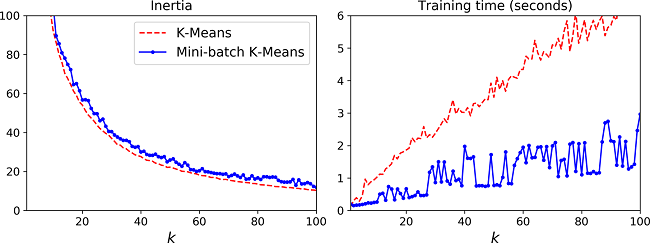
</p>
Figure 9-6. Mini-batch K-Means has a higher inertia than K-Means (left) but it is much faster
(right), especially as k increases

The difference between the two curves remains fairly constant, but this difference becomes more and more significant as k increases, since the inertia becomes smaller and smaller

In the plot on the right, you can see that Mini-batch K-Means is much faster than regular K-Means, and this difference increases with k

### Finding the optimal number of clusters

So far, we have set the number of clusters k to 5 because it was obvious by looking at the data that this was the correct number of clusters. But in general, it will not be so easy to know how to set k

As you can see in Figure 9-7, setting k to 3 or 8 results in fairly bad models

<p align='center'>
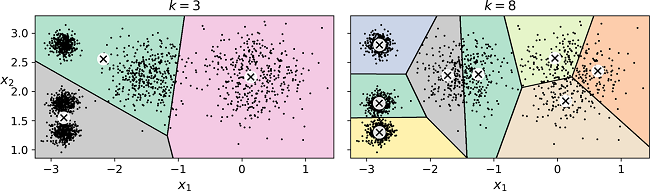
</p>
Figure 9-7. Bad choices for the number of clusters: when k is too small, separate clusters get merged (left), and when k is too large, some clusters get chopped into multiple pieces (right)

You might be thinking that we could just pick the model with the lowest inertia, right? Unfortunately, it is not that simple

The inertia for k=3 is 653.2, which is much higher than for k=5 (which was 211.6). But with k=8, the inertia is just 119.1

The inertia is not a good performance metric when trying to choose k because it keeps getting lower as we increase k. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be

Let’s plot the inertia as a function of k (see Figure 9-8)

<p align='center'>
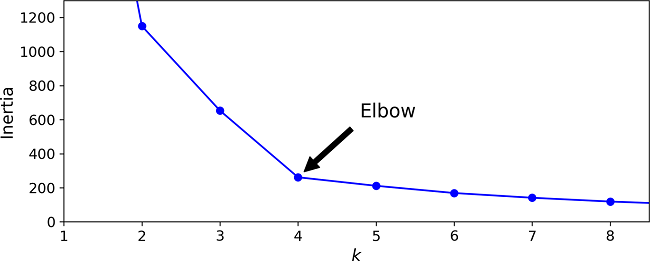
</p>
Figure 9-8. When plotting the inertia as a function of the number of clusters k, the curve often contains an inflexion point called the “elbow”

As you can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an “elbow” at k = 4

So, if we did not know better, 4 would be a good choice: any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no good reason

This technique for choosing the best value for the number of clusters is rather coarse. **A more precise approach (but also more computationally expensive) is to use the silhouette score, which is the mean silhouette coefficient over all the instances**

An instance’s silhouette coefficient is
equal to $(b-a) \over max(a, b)$, where a is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance (i.e., the mean distance to the instances where a is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster)

The silhouette coefficient can vary between –1 and +1. **A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster**

To compute the silhouette score, you can use Scikit-Learn’s silhouette_score() function, giving it all the instances in the dataset and the labels they were assigned:


In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

Let’s compare the silhouette scores for different numbers of clusters (see Figure 9-9)

<p align='center'>
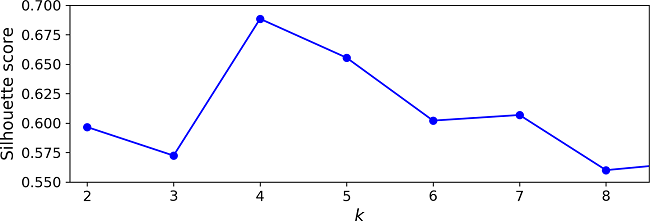
</p>
Figure 9-9. Selecting the number of clusters k using the silhouette score

As you can see, this visualization is much richer than the previous one: although it confirms that k = 4 is a very good choice, it also underlines the fact that k = 5 is quite good as well, and much better than k = 6 or 7. This was not visible when comparing inertias

An even more informative visualization is obtained when you plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient

This is called a silhouette diagram (see Figure 9-10). Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient

<p align='center'>
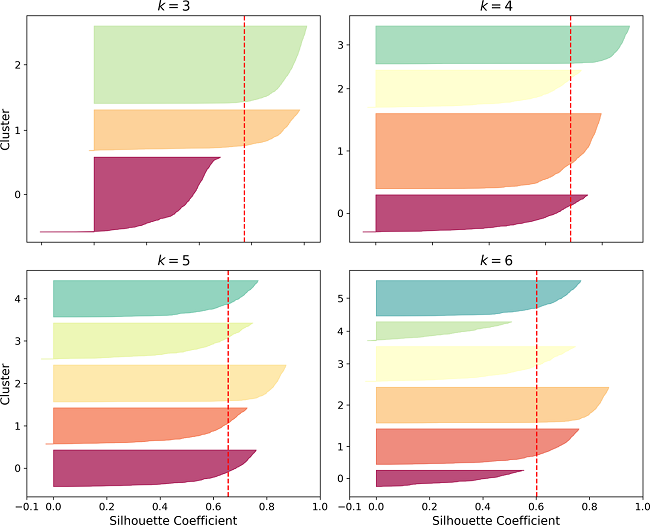
</p>
Figure 9-10. Analyzing the silhouette diagrams for various values of k

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score, then the cluster is rather bad since this means its instances are much too close to other clusters

We can see that when k = 3 and when k = 6, we get bad clusters. But when k = 4 or k = 5, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the third from the top) is rather big. When k = 5, all clusters have similar sizes

So, even though the overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar sizes

## Limits of K-Means

Despite its many merits, most notably being fast and scalable, K-Means is not perfect. As we saw, **it is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes**

For example, Figure 9-11 shows how K-Means clusters a dataset containing three ellipsoidal clusters of different dimensions, densities, and orientations



<p align='center'>
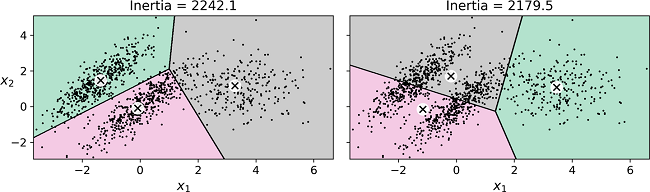
</p>
Figure 9-11. K-Means fails to cluster these ellipsoidal blobs properly

As you can see, neither of these solutions is any good. The solution on the left is better, but it still chops off 25% of the middle cluster and assigns it to the cluster on the right. The solution on the right is just terrible, even though its inertia is lower

So, depending on the data, different clustering algorithms may perform better

It is important to scale the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things


## Using Clustering for Image Segmentation

Image segmentation is the task of partitioning an image into multiple segments. 

**In semantic segmentation, all pixels that are part of the same object type get assigned to the same segment. For example, in a self driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would be one segment containing all the pedestrians)**

**In instance segmentation, all pixels that are part of the same individual object are assigned to the same segment. In this case there would be a different segment for each pedestrian**

The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks (see Chapter 14)

Here, we are going to do something much simpler: color segmentation. We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient. For example, if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine

First, use Matplotlib’s imread() function to load the image function to load the image (see the upper left image in Figure 9-12)


In [15]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import requests

img = requests.get('https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png')
open('ladybug.png', 'wb').write(img.content)
image = imread('ladybug.png')
image.shape


(533, 800, 3)

The image is represented as a 3D array. The first dimension’s size is the height; the second is the width; and the third is the number of color channels, in this case red, green, and blue (RGB)

In other words, for each pixel there is a 3D vector containing the intensities of red, green, and blue, each between 0.0 and 1.0 (or between 0 and 255, if you use imageio.imread())

Some images may have fewer channels, such as grayscale images (one channel). And some images may have more channels, such as images with an additional alpha channel for transparency or satellite images, which often contain channels for many light frequencies (e.g., infrared)

The following code reshapes the array to
get a long list of RGB colors, then it clusters these colors using K-Means:

In [16]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

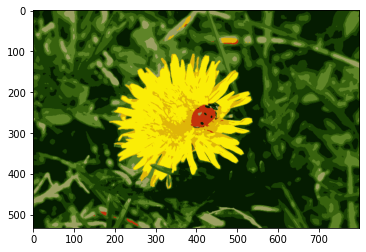

In [17]:
plt.imshow(segmented_img)

For example, it may identify a color cluster for all shades of green. Next, for each color (e.g., dark green), it looks for the mean color of the pixel’ color cluster. For example, all shades of green may be replaced with the same light green color (assuming the mean color of the green cluster is light green). Finally, it reshapes this long list of colors to get the same shape as the original image

This outputs the image shown in the upper right of Figure 9-12. You can experiment with various numbers of clusters, as shown in the figure. When you use fewer than eight clusters, notice that the ladybug’s flashy red color fails to get a cluster of its own: it gets merged with colors from the environment. This is because K-Means prefers clusters of similar sizes. The ladybug is small—much smaller than the rest of the image—so even though its color is flashy, K-Means fails to dedicate a cluster to it



<p align='center'>
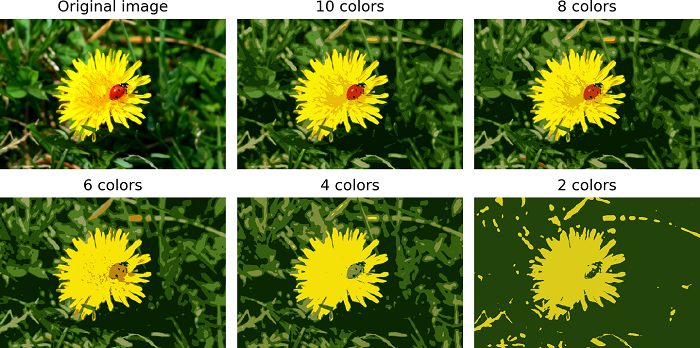
</p>
Figure 9-12. Image segmentation using K-Means with various numbers of color clusters

## Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm

As an example of using clustering for dimensionality reduction, let’ tackle the digits dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8 8 images representing the digits 0 to 9

First, load the dataset:

In [18]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

Now, split it into a training set and a test set:

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

Next, fit a Logistic Regression model:

In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let’s evaluate its accuracy on the test set:

In [21]:
log_reg.score(X_test, y_test)

0.9622222222222222

Let’s see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters, then apply a Logistic Regression model

In [22]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Now let’s evaluate this classification pipeline:

In [23]:
pipeline.score(X_test, y_test)

0.9666666666666667

We reduced the error rate by 1.3%

But we chose the number of clusters k arbitrarily; we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for k is much simpler than earlier

There’s no need to perform silhouette analysis or minimize the inertia; the best value of k is simply the one that results in the best classification performance during cross-validation

We can use GridSearchCV to find the optimal number of clusters:


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(95, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] kmeans__n_clusters=95 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ kmeans__n_clusters=95, total=   8.8s
[CV] kmeans__n_clusters=95 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ............................ kmeans__n_clusters=95, total=   7.4s
[CV] kmeans__n_clusters=95 ...........................................
[CV] ............................ kmeans__n_clusters=95, total=   7.5s
[CV] kmeans__n_clusters=96 ...........................................
[CV] ............................ kmeans__n_clusters=96, total=   8.0s
[CV] kmeans__n_clusters=96 ...........................................
[CV] ............................ kmeans__n_clusters=96, total=   7.9s
[CV] kmeans__n_clusters=96 ...........................................
[CV] ............................ kmeans__n_clusters=96, total=   6.6s
[CV] kmeans__n_clusters=97 ...........................................
[CV] ............................ kmeans__n_clusters=97, total=   8.2s
[CV] kmeans__n_clusters=97 ...........................................
[CV] ............................ kmeans__n_clusters=97, total=   6.2s
[CV] kmeans__n_clusters=97 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                    

Let’s look at the best value for k and the performance of the resulting pipeline:

In [25]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [26]:
grid_clf.score(X_test, y_test)

0.9755555555555555

## Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances

Let’ train a Logistic Regression model on a sample of 50 labeled instances from the digits dataset:

In [27]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=50000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

What is the performance of this model on the test set?

In [28]:
log_reg.score(X_test, y_test)

0.86

Let’ see how we can do better. First, let’s cluster the training set into 50 clusters. Then for each cluster, let’s find the image closest to the centroid

We will call these images the representative images:

In [29]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Figure 9-13 shows these 50 representative images

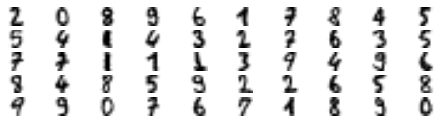

In [30]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

Figure 9-13. Fifty representative digit images (one per cluster)

Let’s look at each image and manually label it:

In [31]:
y_representative_digits = np.array([
    2, 6, 9, 0, 8, 4, 1, 6, 3, 7,
    4, 8, 2, 7, 2, 5, 0, 1, 4, 7,
    8, 1, 2, 1, 1, 7, 6, 5, 3, 5,
    9, 5, 8, 2, 6, 9, 9, 7, 1, 7,
    3, 3, 7, 2, 9, 5, 4, 3, 1, 4])

Now we have a dataset with just 50 labeled instances, but instead of being random instances, each of them is a representative image of its cluster. Let’s see if the performance is any better

In [32]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.11777777777777777

We jumped from 83% accuracy to 92%, although we are still only training the model on 50 instances. Since it is often costly and painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances

But perhaps we can go one step further: **what if we propagated the labels to all the other instances in the same cluster? This is called label propagation:**

In [33]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

Now let’s train the model again and look at its performance:

In [34]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
log_reg.score(X_test, y_test)

0.07333333333333333

We got a reasonable accuracy boost, but nothing absolutely astounding. The problem is that we propagated each representative instance’s label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled

Let’s see what happens if we only propagate the labels to the 75% of the instances that are closest to the centroids:

In [36]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_pratially_propagated = y_train_propagated[partially_propagated]

Now let’s train the model again on this partially propagated dataset:

In [37]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_pratially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
log_reg.score(X_test, y_test)

0.08222222222222222

With just 75 labeled instances, we got 93.5% accuracy, which is pretty close to the performance of Logistic Regression on the fully labeled digits dataset (which was 96.9%)

which is pretty close to the performance of Logistic Regression on the fully labeled digits dataset (which was 97%)

In [39]:
np.mean(y_train_pratially_propagated == y_train[partially_propagated])

0.079

You could now do a few iterations of active learning:

* Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters

* Train a new model with these additional labels

## DBSCAN

**This algorithm defines clusters as continuous regions of high density**. Here is how it works:

* **For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood**

* If an instance has at least min_samples instances in its ε neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions

* All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster

* Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly

This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions

The DBSCAN class in Scikit- Learn is as simple to use as you might expect. Let’s test it on the moons dataset

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

The labels of all the instances are now available in the labels_ instance variable:

In [41]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

Notice that some instances have a cluster index equal to –1, which means that they are considered as anomalies by the algorithm

The indices of the

core instances are available in the core_sample_indices_ instance variable, and the core instances themselves are available in the components_ instance variable:

In [42]:
len(dbscan.core_sample_indices_)

808

In [43]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [44]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

This clustering is represented in the lefthand plot of Figure 9-14. As you can see, it identified quite a lot of anomalies, plus seven different clusters. 
If we widen each instance’s neighborhood by increasing eps to 0.2, we get the clustering on the right, which looks perfect

<p align='center'>
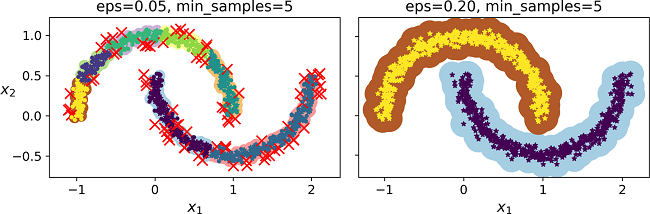
</p>
Figure 9-14. DBSCAN clustering using two different neighborhood radiuses

Somewhat surprisingly, the DBSCAN class does not have a predict() method, although it has a fit_predict() method

In other words, **it cannot predict which cluster a new instance belongs to**

This implementation decision was made because different classification algorithms can be better for different tasks, so the authors decided to let the user choose which one to use

Moreover, it’s not hard to implement. For example, let’s train a KNeighborsClassifier:

In [45]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

Now, given a few new instances, we can predict which cluster they most likely belong to and even estimate a probability for each cluster:

In [47]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

Note that we only trained the classifier on the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies: this choice depends on the final task

The decision boundary is represented in Figure 9-15 (the crosses represent the four instances in X_new). Notice that since there is no anomaly in the training set, the classifier always chooses a cluster, even when that cluster is far away

<p align='center'>
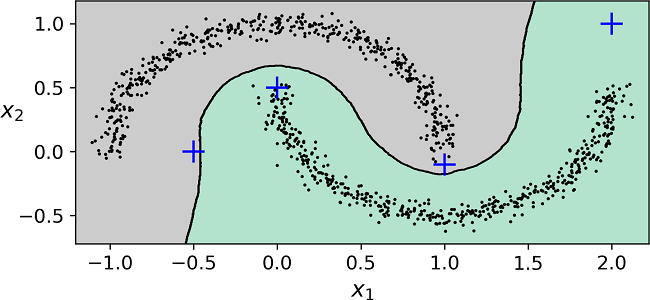
</p>
Figure 9-15. Decision boundary between two clusters

It is fairly straightforward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies

To do this, use the kneighbors() method of the KNeighborsClassifier. Given a set of instances, it returns the distances and the indices of the k nearest neighbors in the training set (two matrices, each with k columns):

In [48]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape. It is robust to outliers, and it has just two hyperparameters (eps and min_samples)

If the density varies significantly across the clusters, however, it can be impossible for it to capture all the clusters properly

Its computational complexity is roughly $O(m\space logm)$, making it pretty close to linear with regard to the number of instances, but Scikit-Learn’s implementation can require up to $O(m^2)$ memory if eps is large

## Other Clustering Algorithms

### Agglomerative clustering

A hierarchy of clusters is built from the bottom up. Think of many tiny bubbles floating on water and gradually attaching to each other until there’s one big group of bubbles. Similarly, at each iteration, agglomerative clustering connects the nearest pair of clusters (starting with individual instances)

If you drew a tree with a branch for every pair of clusters that merged, you would get a binary tree of clusters, where the leaves are the individual instances. This approach scales very well to large numbers of instances or clusters. It can capture clusters of various shapes, it produces a flexible and informative cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance

It can scale nicely to large numbers of instances if you provide a connectivity matrix, which is a sparse $m \times m$ matrix that indicates which pairs of instances are neighbors (e.g., returned by sklearn.neighbors.kneighbors_graph())

Without a connectivity matrix, the algorithm does not scale well to large datasets



### BIRCH

The BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) algorithm was designed specifically for very large datasets, and it can be faster than batch K-Means, with similar results, as long as the number of features is not too large (<20)

During training, it builds a tree structure containing just enough information to quickly assign each new instance to a cluster, without having to store all the instances in the tree: this approach allows it to use limited memory, while handling huge datasets

### Mean-Shift

This algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean

Next, it iterates this mean-shifting step until all the circles stop moving (i.e., until each of them is centered on the mean of the instances it contains). Mean-Shift shifts the circles in the direction of higher density, until each of them has found a local density maximum

Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster. Mean-Shift has some of the same features as DBSCAN, like how it can find any number of clusters of any shape, it has very few hyperparameters (just one—the radius of the circles, called the bandwidth), and it relies on local density estimation

But unlike DBSCAN, Mean-Shift tends to chop clusters into pieces when they have internal density variations

Unfortunately, its computational complexity is $O(m^2)$, so it is not suited for large datasets

### Affinity propagation

This algorithm uses a voting system, where instances vote for similar instances to be their representatives, and once the algorithm converges, each representative and its voters form a cluster

Affinity propagation can detect any number of clusters of different sizes. Unfortunately, this algorithm has a computational complexity of $O(m^2)$, so it too is not suited for large datasets

### Spectral clustering

This algorithm takes a similarity matrix between the instances and creates a low-dimensional embedding from it (i.e., it reduces its dimensionality), then it uses another clustering algorithm in this low dimensional space (Scikit-Learn’s implementation uses K-Means.)

Spectral clustering can capture complex cluster structures, and it can also be used to cut graphs (e.g., to identify clusters of friends on a social network)

It does not scale well to large numbers of instances, and it does not behave well when the clusters have very different sizes

# Gaussian Mixtures

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown

All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation, just like in Figure 9-11

When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you do not know what the parameters of these distributions are

There are several GMM variants. In the simplest variant, implemented in the GaussianMixture class, you must know in advance the number k of Gaussian distributions. The dataset X is assumed to have been generated through the following probabilistic process:

* For each instance, a cluster is picked randomly from among k clusters. The probability of choosing the $j^{th}$ cluster is defined by the cluster's weight, $\phi^{(j)}$. The index of the cluster chosen for the $i^{th}$ instance is noted $z^{(i)}$

* If $z^{(i)} = j$, meaning the $i^{th}$ instance has been assigned to the $j^{th}$ cluster, the location $x^{(i)}$ of this instance is sampled randomly from the Gaussian distribution with mean $\mu^{(j)} $ and covariance matrix $\Sigma^{(j)}$. This is noted $x^{(i)}  N(\mu^{(j)}, \Sigma^{(j)})$

This generative process can be represented as a graphical model. Figure 9- 16 represents the structure of the conditional dependencies between random variables

<p align='center'>
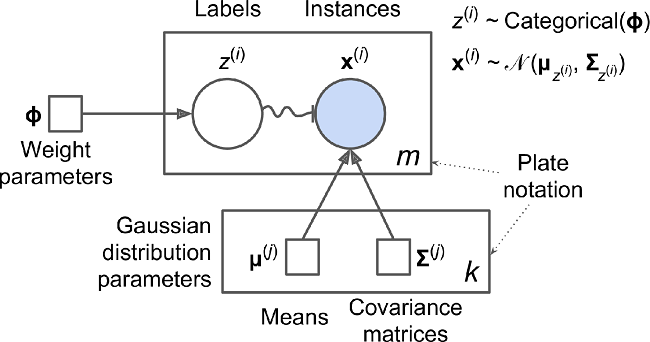
</p>
Figure 9-16. A graphical representation of a Gaussian mixture model, including its parameters (squares), random variables (circles), and their conditional dependencies (solid arrows)

* The circles represent random variables

* The squares represent fixed values (i.e., parameters of the model)

* The large rectangles are called plates. They indicate that their content is repeated several times

* The number at the bottom right of each plate indicates how many times its content is repeated. So, there are m random variables $z^{(i)}$ (from $z^{(i)}$ to $z^{(m)}$) and m random variables $x^{(i)}$. There are also k means $\mu^{(j)}$ and k covariance matrices $\Sigma^{(j)}$. Lastly, there is just one weight vector $\phi$ (containing all hte weights $\phi^{(1)}$ to $\Phi^{(k)}$ 

* Each variable $z^{(i)}$ is drawn from the categorical distribution with weights $\Phi$. Each variable $x^{(i)}$ is drawn from the normal distribution, with the mean and covariance matrix defined by its cluster $z^{(i)}$

* The solid arrows represent conditional dependencies. For example, the probability distribution for each random variable $z^{(i)}$ depends on the weight vector $\Phi$. Note that when an arrow crosses a plate boundary, it means that it applies to all the repetitions of that plate. For example, the weight vector $\Phi$ conditions the probability distributions of all the random variables $x^{(1)}$ to $x^{(m)}$

* The squiggly arrow from $z^{(i)}$ to $x^{(i)}$ represents a switch: depending on the value of $z^{(i)}$, the instance $x^{(i)}$ will be sampled from a different Gaussian distribution. For example, if $z^{(i)}=j$, then $x^{(i)} ~ N(\mu^{(j)}, \Sigma^{(j)})$

* Shaded nodes indicate that the value is known. So, in this case, only the random variables $x^{(i)}$ have known values: they are called observed variables. The unknown random variables $z^{(i)}$ are called latent variables

Given the dataset X, you typically want to start by estimating the weights $\Phi$ and all the distribution parameters $\mu^{(1)}$ to $\mu^{(k)}$ and $\Sigma^{(1)}$ to $\Sigma^{(k)}$

Scikit-Learn's GaussianMixture class makes this super easy

In [53]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Let’s look at the parameters that the algorithm estimated:

In [54]:
gm.weights_

array([0.20841884, 0.20342295, 0.58815821])

In [55]:
gm.means_

array([[ 1.73149781, -0.06870629],
       [-0.74763075,  0.55592231],
       [ 0.49384971,  0.25485053]])

In [56]:
gm.covariances_

array([[[ 0.0608794 ,  0.06552195],
        [ 0.06552195,  0.08768241]],

       [[ 0.05359891,  0.06209569],
        [ 0.06209569,  0.0899012 ]],

       [[ 0.16433764, -0.09787056],
        [-0.09787056,  0.28778695]]])

**This class relies on the Expectation-Maximization (EM) algorithm, which has many similarities with the K-Means algorithm: it also initializes the cluster parameters randomly, then it repeats two steps until convergence**, first assigning instances to clusters (this is called the expectation step) and then updating the clusters (this is called the maximization step)

In the context of clustering, you can think of EM as a generalization of K-Means that not only finds the cluster centers ($\mu^{(1)}$ to $\mu^{(k)}$), but also their size, shape, and orientation ($\Sigma^{(1)}$ to $\Sigma^{(k)}$), as well as their relative weights ($\Phi^{(1)}$ to $\Phi^{(k)}$)

Unlike K-Means, though, **EM uses soft cluster assignments, not hard assignments**. For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster

These probabilities are called the **responsibilities** of the clusters for the instances. During the maximization step, each cluster’s update will mostly be impacted by the instances it is most responsible for


> Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10: by default n_init is set to 1

You can check whether or not the algorithm converged and how many iterations it took:

In [60]:
gm.converged_

True

In [58]:
gm.n_iter_

17

Now that you have an estimate of the location, size, shape, orientation, and relative weight of each cluster, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering)

Just use the predict() method for hard clustering, or the predict_proba() method for soft clustering:

In [69]:
gm.predict(X)

array([2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1,
       2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2,

In [62]:
gm.predict_proba(X)

array([[1.56207954e-081, 4.97001799e-014, 1.00000000e+000],
       [3.26934977e-004, 1.25119870e-121, 9.99673065e-001],
       [8.99901633e-007, 5.35474923e-109, 9.99999100e-001],
       ...,
       [9.83978703e-001, 1.67433513e-185, 1.60212975e-002],
       [7.51442050e-162, 9.99676556e-001, 3.23444308e-004],
       [4.46795957e-039, 5.30704739e-046, 1.00000000e+000]])

**A Gaussian mixture model is a generative model, meaning you can sample new instances from it** (note that they are ordered by cluster index):

In [70]:
X_new, y_new = gm.sample(6)
X_new

array([[ 1.47611278, -0.17437464],
       [-0.68001844,  0.61333588],
       [-1.14907632,  0.1278135 ],
       [-0.68008991,  0.72201999],
       [ 0.48922945, -0.05709846],
       [-0.13100335,  0.07173407]])

In [71]:
y_new

array([0, 1, 1, 1, 2, 2])

**It is also possible to estimate the density of the model at any given location**

This is achieved using the score_samples() method: for each instance it is given, this method estimates the log if the probability density function (PDF) at that location. The greater the score, the higher the density:

In [73]:
gm.score_samples(X)[:5]

array([-1.59012095, -1.83347078, -1.5681778 , -1.90444736, -0.2349209 ])

If you compute the exponential of these scores, you get the value of the PDF at the location of the given instances. These are not probabilities, but probability densities: they can take on any positive value, not just a value between 0 and 1

To estimate the probability that an instance will fall within a particular region, you would have to integrate the PDF over that region (if you do so over the entire space of possible instance locations, the result will be 1)

Figure 9-17 shows the cluster means, the decision boundaries (dashed lines), and the density contours of this model

<p align='center'>
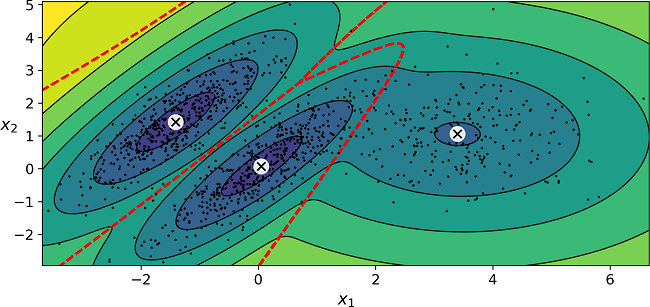
</p>
Figure 9-17. Cluster means, decision boundaries, and density contours of a trained Gaussian mixture model

When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution. You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn

One way to do this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices

To do this, set the covariance_type hyperparameter to one of the following values:

**"spherical"**
* All clusters must be spherical, but they can have different diameters (i.e., different variances)

**"diag"**
* Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal)

**"tied"**
* All clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix)

By default, covariance_type is equal to "full", which means that each cluster can take on any shape, size, and orientation (it has its own unconstrained covariance matrix)

Figure 9-18 plots the solutions found by the EM algorithm when covariance_type is set to "tied" or "spherical"

<p align='center'>
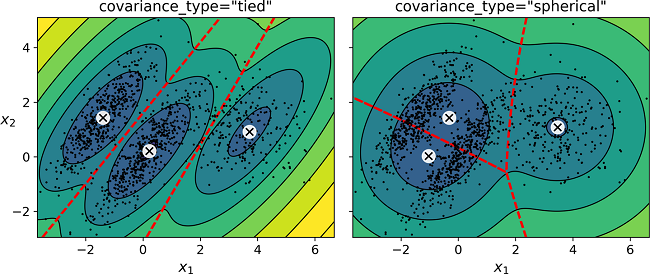
</p>
Figure 9-18. Gaussian mixtures for tied clusters (left) and spherical clusters (right)

Computational complexity:

* If covariance_type is "spherical" or "diag", it is $O(kmn)$

* If covariance_type is "tied" or "full", it is $O(kmn^2 + kn^3)$

## Anomaly Detection Using Gaussian Mixtures

**Anomaly detection (also called outlier detection) is the task of detecting instances that deviate strongly from the norm**. These instances are called anomalies, or outliers, while the normal instances are called inliers

**Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly**

You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well known. Say it is equal to 4%. You then set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density. If you notice that you get too many false positives (i.e., perfectly good products that are flagged as defective), you can lower the threshold. Conversely, if you have too many false negatives (i.e., defective products that the system does not flag as defective), you can increase the threshold This is the usual precision/recall trade-off

Here is how you would identify the outliers using the fourth percentile lowest density as the threshold (i.e., approximately 4% of the instances will be flagged as anomalies)

In [74]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

Figure 9-19 represents these anomalies as stars

<p align='center'>
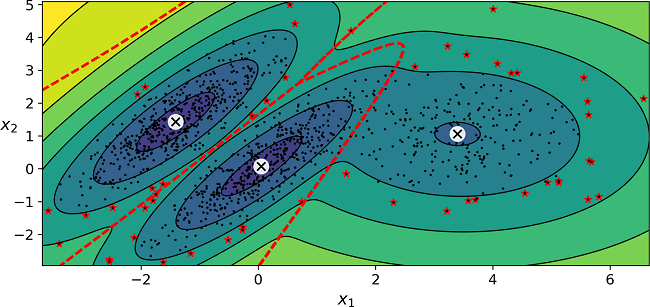
</p>
Figure 9-19. Anomaly detection using a Gaussian mixture model

A closely related task is novelty detection: it differs from anomaly detection in that the algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Indeed, outlier detection is often used to clean up a dataset

## Selecting the Number of Clusters